<a href="https://colab.research.google.com/github/aminar034/ml1000-p1/blob/working_models/Project1_wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Executive Summary 

**Abstract**

Quality is the degree to which a product meets specified requirements. To assess white wine quality, it is essential to select measure(s) that directly impact its quality. In this study, we will be using physicochemical properties as features to evaluate the white wine’s quality attribute.

**Background**

Our client is the retailer and wholesaler, Liquor Control Board of Ontario (LCBO). They would like to assess white wine quality to determine its prices as part of their research quality management. Wine quality can be assessed either by physicochemical properties or by human sensory testing. Physicochemical properties include pH, dissolved salts, sodium levels, the acidity, and density. As the demand of high-quality wine is increasing, the need for better prediction of wine quality in an efficient and convenient way is also in high demand. Human sensory testing of wine quality can be a time-consuming process and open to interpretation. Another method in wine informatics is exploring machine learning techniques to classify various wine attributes such as quality based on wine quality evaluation.

**Objective**
The objective of this study is to use binary classification model to determine if white wine quality is high or low based on several important physicochemical properties.



## Install packages and load in dataset

* When using colab, need to install pycaret everytime
* Read in the wine quality dataset using the "raw" link from the git repository
  * alternatively can use any other url for the data that ends in .csv
  * trying to avoid linking the colab notebook to git, google drive or local server for reproducibility

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 1.

In [ ]:
import pandas as pd

df_path = 'https://raw.githubusercontent.com/DeepCodeSec/ml1000-p1/working_models/data/winequality-white.csv'  
dataset = pd.read_csv(df_path, 
                   sep=';') #the separater in the raw data is ;. need to indicate so columns are found
dataset.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Recode quality to a binary label
**Original**: quality of wine rated from 0-10 with 10 as the best

Above shows that the minimum rating was a 3 and max is 9. The mean and median are both ~6.

According to the website below, a rating of 7+ is good wine. https://vineroutes.com/wine-rating-system/#:~:text=Wines%20rated%2089%20and%20above,outstanding%20for%20its%20particular%20type. 

**New**: For the purpose of classification, we recode quality to a binary label: 1 = 'high quality' if the quality rating was 7 or above, and 0 = 'standard' where the quality rating was 6 or lower.

In [ ]:
import numpy as np

#add binary classification label
dataset['new_quality'] = np.where(dataset['quality'] > 6, 
                               1,
                               0)
dataset.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.1,0.260,0.29,12.4,0.044,62.0,240.0,0.9969,3.04,0.42,9.2,6,0
96,6.0,0.340,0.66,15.9,0.046,26.0,164.0,0.9979,3.14,0.50,8.8,6,0
97,8.6,0.265,0.36,1.2,0.034,15.0,80.0,0.9913,2.95,0.36,11.4,7,1
98,9.8,0.360,0.46,10.5,0.038,4.0,83.0,0.9956,2.89,0.30,10.1,4,0


In [ ]:
#drop old quality column and rename new
dataset = dataset.drop(columns=['quality']) #drops old column
dataset = dataset.rename(columns={'new_quality':'quality'}) #renames back to quality

dataset.head() #double check it did what we asked

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


## Exploratory Analysis Report

The code below automatically creates an exploratory data analysis repor which is output as an html file in the local files. What follows are the highlights of this EDA report:

In [ ]:
#Load libraries for exploratory analysis
!pip3 install pandas_profiling --upgrade
import pandas_profiling
from pandas_profiling import ProfileReport
import pandas as pd

pr = ProfileReport(dataset)

pr.to_file(output_file="EDA.html")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-5-37cfb9f18440>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#basic structure of dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
#check for missing values
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Dataset has:**
* 12 variables (11 numeric predictors and 1 categorical label that was recoded to binary 0 = standard, 1 = high quality)
* 4898 observations
* no missing values



,quality
count,4898.000000
mean,0.216415
std,0.411842
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


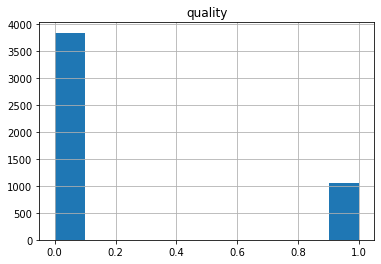

In [ ]:
#Distribution of target variable
dataset.hist(column='quality')
dataset[['quality']].describe()

In [ ]:
#Determine proportion of high quality wines in dataset
np.count_nonzero(dataset['quality']==1)/len(dataset['quality'])

0.21641486320947326

In [ ]:
#Distribution of numeric predictors
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.216415
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.411842
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,0.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,0.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


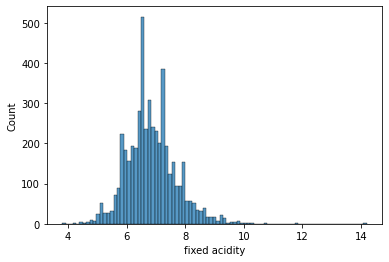

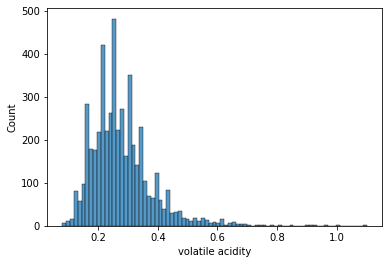

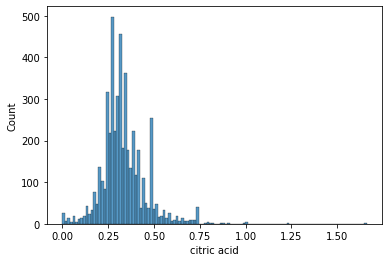

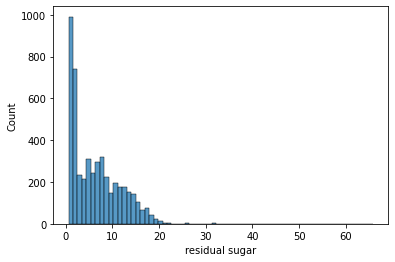

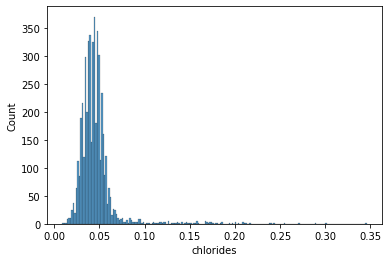

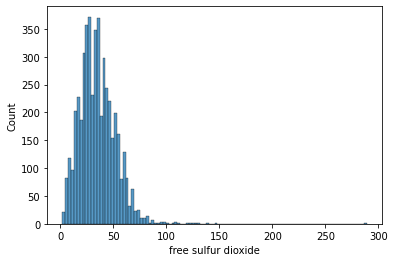

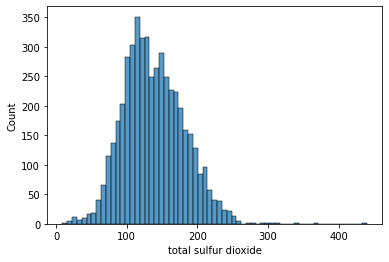

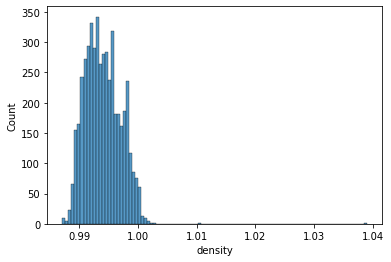

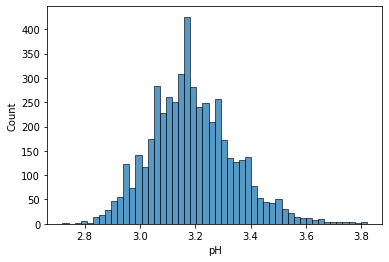

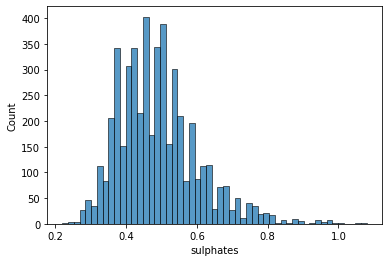

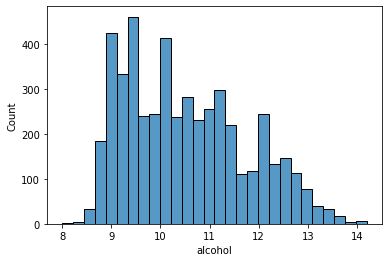

In [ ]:
# Outlier analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cols = list(dataset.columns)

#Create boxplot for every numeric feature (cols 0-11) to show outliers
for col in cols[0:-1]:
  plt.figure()
  sns.histplot(dataset[col])
  plt.show()

**Distributions**:
* We have imbalanced label classes (~20% high quality and 80% standard) which indicates that we will need to think about undersampling and choose the appropriate performance metric to evaluate the trained models.
* The numeric predictors are on vastly different scales which can skew the weigthing and importance of certain predictors. Therefore, we will need to scale the features before training the models.
* Many predictors have a fairly normal distribution, but others such as alcohol, residual sugar, and citric acid are clearly non-normally distributed. We will apply transformations to make them look more normal in the experiment setup before training the models.

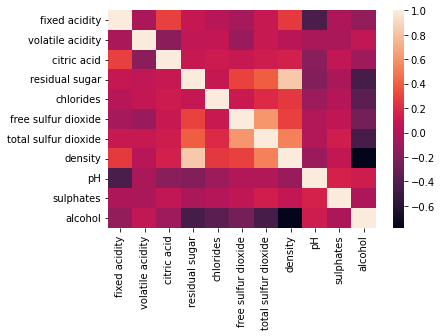

In [ ]:
#Correlation matrix for numeric predictor variables
corr = dataset.iloc[:,:-1].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

**Correlations:**
* Moderate to strong negative correlations between alcohol and density, and pH and fixed acidity. Strong positive correlation between density and residual sugar. We will address the multicollinearity in the experiment setup before training the models.


## Split dataset

* 5% test set (unseen until after model is finalized) 
* The remaining 95% will be split in the pycaret setup function

First we remove the 5% test set before any feature engineering to avoid data leakage. Test set is randomly shuffled.

After feature engineering, the remaining data will be split into training and validation sets that follow the same distribution of target labels (ie using stratified sampling).

In [ ]:
# split data into 95% and 5%
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4653, 12)
Unseen Data For Predictions: (245, 12)


In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.9,0.28,0.49,7.7,0.045,48.0,195.0,0.99540,3.04,0.55,11.0,0
1,5.0,0.24,0.19,5.0,0.043,17.0,101.0,0.99438,3.67,0.57,10.0,0
2,8.3,0.26,0.31,2.0,0.029,14.0,141.0,0.99077,2.95,0.77,12.2,0
3,7.7,0.25,0.30,7.8,0.038,67.0,196.0,0.99555,3.10,0.50,10.1,0
4,4.4,0.32,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,1


In [ ]:
data_unseen.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
1,8.6,0.23,0.40,4.2,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,0
2,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,1
3,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,0
4,6.0,0.19,0.26,12.4,0.048,50.0,147.0,0.9972,3.30,0.36,8.9,0


## Data Cleaning

Here we make our data cleaning decisions. As discussed above, we only have one categorical variable, the target label, which has already been one hot encoded. We do not need to do further categorical processing. Further, the data does not contain any missing values, so no imputation or row removal was needed. Exploratory data analysis revealed the numeric features have varying scales and several are non-normally distributed. We will address both in the experiment setup section. Finally, we need to check the data for outliers.

### Outlier analysis

Two options: 
1.   When lots of observations in dataset and only a few rows with outlier values (for any column), just remove rows containing outliers. Alternatively, we leave the feww outliers as is because they may be potentially informative.

2.   When fewer observations and more rows containing outlier values, cap the values at the 5th and 95th percentiles.

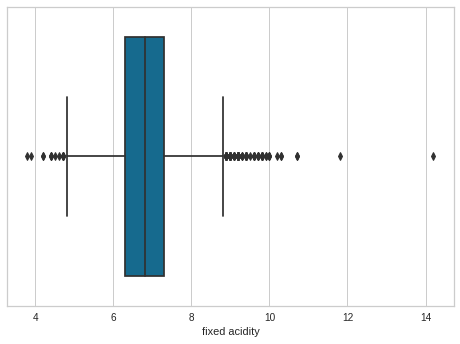

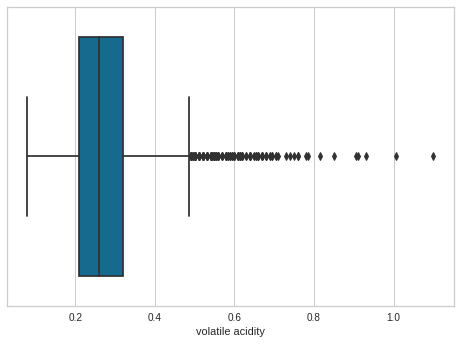

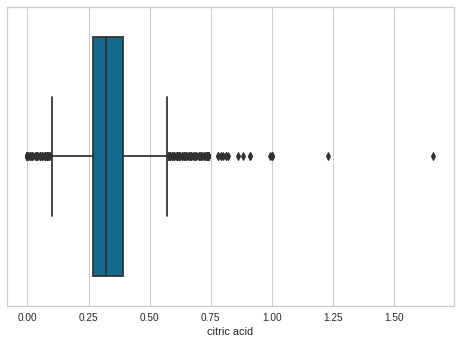

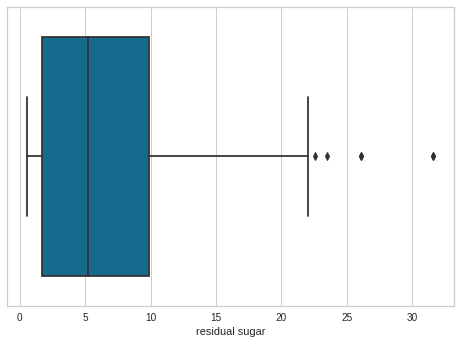

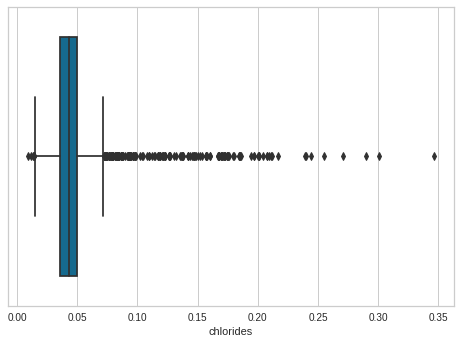

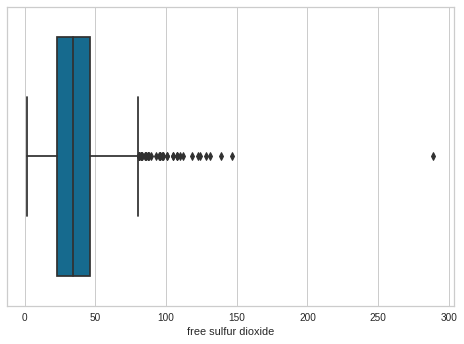

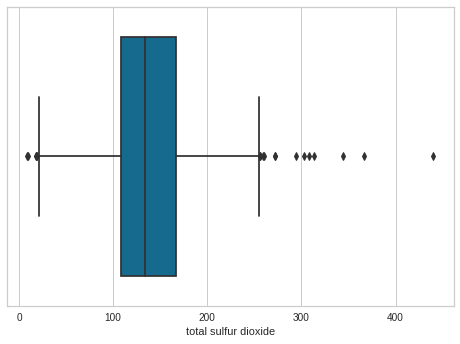

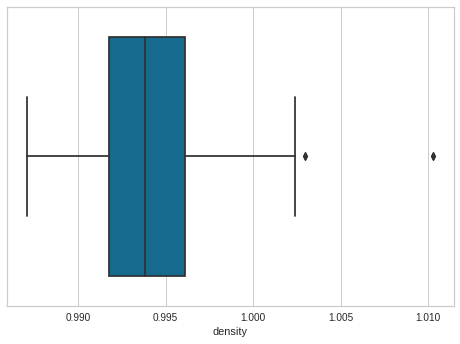

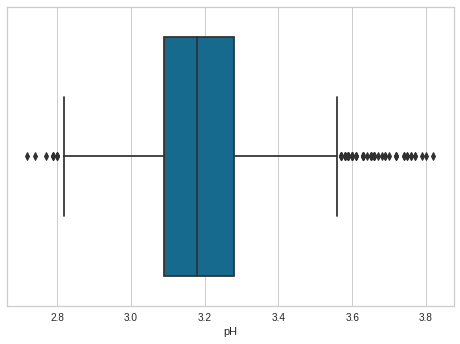

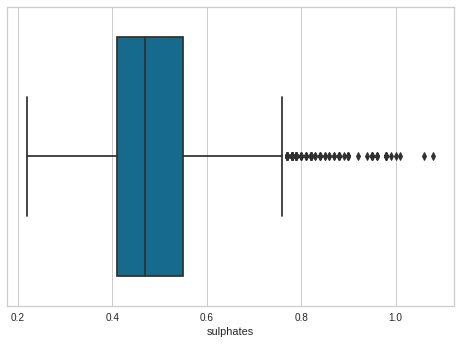

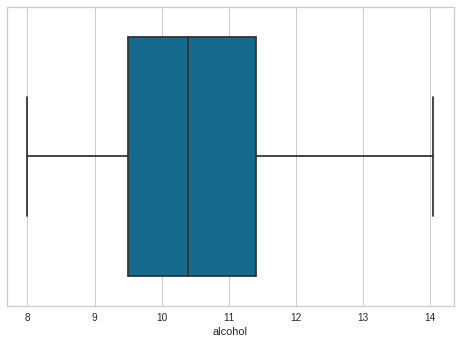

In [ ]:
# Outlier analysis
cols = list(data.columns)

#Create boxplot for every numeric feature (cols 0-11) to show outliers
for col in cols[0:-1]:
  plt.figure()
  sns.boxplot(data[col])
  plt.show()


The boxplots indicate that most of the predictors contain outlier values. Some of these predictors, like chlorides, contain a large number of outliers. Since there are so many outlier values, removing rows that contain outliers could leave us with a very small fraction of the original data. We opt to cap the values at the 5th and 95th percentiles to retain as much data as possible.

In [ ]:
tmp = data #creating a temporary to avoid accidentally overwriting the original (let's us compare and verify capping)
data_clean = data

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,6.854406,0.277909,0.334030,6.405029,0.045796,35.343327,138.489792,0.994038,3.187746,0.489695,10.504821,0.215345
std,0.844952,0.100298,0.121024,5.008390,0.021997,17.025677,42.445410,0.002917,0.149787,0.113718,1.227265,0.411106
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991750,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993800,3.180000,0.470000,10.400000,0.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996120,3.280000,0.550000,11.400000,0.000000
max,14.200000,1.100000,1.660000,31.600000,0.346000,289.000000,440.000000,1.010300,3.820000,1.080000,14.050000,1.000000


In [ ]:
cols = list(data.columns)

#Create boxplot for every numeric feature (cols 0-11) to show outliers
for col in cols[0:-1]:
  upper_limit = tmp[col].mean() + 3*tmp[col].std() #~95th percentile
  lower_limit = tmp[col].mean() - 3*tmp[col].std() #~5th percentile
  
  data_clean[col] = np.where(tmp[col]> upper_limit, upper_limit, #if above 95th, set to upper
                        np.where(tmp[col]< lower_limit, lower_limit, #if below 5th, set to lower
                        tmp[col]))


In [ ]:
#Capped distributions. Verify by checking max and min
data_clean.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,6.849577,0.275908,0.332161,6.397574,0.043971,35.156199,138.376386,0.994035,3.187265,0.488733,10.504821,0.215345
std,0.823442,0.092507,0.113452,4.980448,0.012600,16.063421,41.960838,0.002903,0.148137,0.110286,1.227265,0.411106
min,4.378806,0.080000,0.000000,0.600000,0.009000,2.000000,12.493214,0.987110,2.742837,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991750,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993800,3.180000,0.470000,10.400000,0.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996120,3.280000,0.550000,11.400000,0.000000
max,9.320441,0.554230,0.673250,21.338944,0.083806,83.361560,264.259665,1.002743,3.631697,0.819693,14.050000,1.000000


## Training classifier models

Now that the data is clean, we can set up the classifier experiment pipeline. We address some final data cleaning issues in the experiment setup. For example, the values of the chlorides column ranges from 0.009 - 0.346 while residual sugar ranges from 0.6 - 65.8. This impacts performance on certain classifier algorithms, therefore we choose to z-score normalize the features to put them all on the same scale (-3 to +3). This is specified in the 'normalize=True' argument. Second, we use the 'transformation=True' arguement to transofrm the features into a more guassian (normal) distribution. Next, we address the multicollinearity in the data using the 'remove_multicollinearity' arguement. The threshold for multicollinearity was set to 0.7. Inter-correlated features that exceeded the 0.7 threshold were removed, and when two features are highly correlated with each other (for example, density and residual sugar) the feature that is least correlated with the target variable is removed. Finally, we address the imbalance in the target variable by employing the SMOTE algorithm which synthesises new examples from the minority class, in this case, high quality wines.

In [ ]:
from pycaret.classification import *

In [ ]:
exp_P1clf = setup(data = data_clean, #make sure to use cleaned data (outliers capped)
                   target = 'quality', data_split_stratify = True, session_id = 123,
                   transformation=True, #applies the power transform to make data more Gaussian-like
                   normalize=True, #transforms the numeric features by scaling them to a given range (default is z-score)
                   remove_multicollinearity=True, #features with the inter-correlations higher than the defined threshold are removed
                   multicollinearity_threshold = 0.7, #by default was 0.9
                   fix_imbalance=True #default method is SMOTE
                )

,Description,Value
0,session_id,123
1,Target,quality
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4653, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('dummy', Dummify(target='quality')),
                ('fix_perfect', Remove_100(target='quality')),
                ('clean_names', Clean_Colum_Names()),
   

In [ ]:
#Find best model
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8618,0.9110,0.6990,0.6731,0.6829,0.5949,0.5972,0.463
rf,Random Forest Classifier,0.8493,0.8993,0.6975,0.6375,0.6642,0.5675,0.5699,1.175
lightgbm,Light Gradient Boosting Machine,0.8394,0.8786,0.6177,0.6314,0.6226,0.5209,0.5222,0.243
dt,Decision Tree Classifier,0.8004,0.7466,0.6520,0.5297,0.5836,0.4544,0.4593,0.097
dummy,Dummy Classifier,0.7848,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.027
gbc,Gradient Boosting Classifier,0.7835,0.8475,0.7219,0.4983,0.5890,0.4489,0.4636,1.213
ada,Ada Boost Classifier,0.7562,0.8135,0.7162,0.4589,0.5589,0.4018,0.4210,0.258
knn,K Neighbors Classifier,0.7498,0.8262,0.7561,0.4521,0.5649,0.4048,0.4322,0.073
lr,Logistic Regression,0.7099,0.7818,0.7819,0.4088,0.5368,0.3544,0.3943,0.317
ridge,Ridge Classifier,0.7046,0.0000,0.7947,0.4051,0.5365,0.3517,0.3951,0.042


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


The top three classifiers are extra trees, random forest, and light gradient boosting which show similar accuracy, auc and precision scores on the training data. Models preform differently on training data than they do on validation data, therefore we will tune and evaluate the top three models before seleting the best performer for the client.

Since our data is imbalanced, accuracy is not our most important performance metric. Since the client is most concerned with accurately predicting high quality wine (true positives), we will focus on the models' precision scores and use confusion matrices to evaluate performance.

In [ ]:
# train a extra tree model
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8466,0.9086,0.5714,0.6667,0.6154,0.5203,0.5227
1,0.8650,0.9169,0.7571,0.6625,0.7067,0.6195,0.6219
2,0.8620,0.8993,0.6571,0.6866,0.6715,0.5842,0.5844
3,0.8620,0.9085,0.6286,0.6984,0.6617,0.5753,0.5765
4,0.8804,0.9313,0.7714,0.7013,0.7347,0.6577,0.6589
5,0.8497,0.8700,0.5714,0.6780,0.6202,0.5273,0.5303
6,0.8558,0.9076,0.7324,0.6500,0.6887,0.5954,0.5972
7,0.8954,0.9568,0.8714,0.7093,0.7821,0.7142,0.7207
8,0.8646,0.9213,0.7143,0.6757,0.6944,0.6076,0.6080


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
# train a random forest model
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8405,0.8884,0.6857,0.6154,0.6486,0.5459,0.5472
1,0.8374,0.8989,0.7286,0.6000,0.6581,0.5527,0.5572
2,0.8405,0.8996,0.6143,0.6324,0.6232,0.5220,0.5221
3,0.8528,0.8967,0.6286,0.6667,0.6471,0.5541,0.5545
4,0.8528,0.9151,0.7429,0.6341,0.6842,0.5890,0.5921
5,0.8344,0.8573,0.5571,0.6290,0.5909,0.4875,0.4890
6,0.8558,0.9143,0.7465,0.6463,0.6928,0.5993,0.6019
7,0.8862,0.9471,0.8143,0.7037,0.7550,0.6813,0.6844
8,0.8523,0.9005,0.7000,0.6447,0.6712,0.5762,0.5770


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
# train a lgb model
lgb = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8313,0.8808,0.6000,0.6087,0.6043,0.4971,0.4971
1,0.8405,0.8876,0.6143,0.6324,0.6232,0.5220,0.5221
2,0.8282,0.8688,0.5571,0.6094,0.5821,0.4743,0.4750
3,0.8497,0.8727,0.5429,0.6909,0.6080,0.5167,0.5224
4,0.8221,0.8928,0.6571,0.5750,0.6133,0.4985,0.5003
5,0.8344,0.8431,0.5571,0.6290,0.5909,0.4875,0.4890
6,0.8497,0.8886,0.6197,0.6667,0.6423,0.5474,0.5479
7,0.8862,0.9338,0.8000,0.7089,0.7517,0.6782,0.6803
8,0.8554,0.8758,0.6571,0.6667,0.6619,0.5699,0.5699


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


## Tuning the Models 

We use the tune_model function to find the optimal hyperparameters for the model. Our performance metric will be precision because the client is most concerned with the model's ability to identify true positives. That is, the LCBO wants to accurately price the high quality wines and maintain customer trust in their evaluations. If a high quality wine is misclassified as standard, the client loses profit. On the other hand, if a lower quality wine is overpriced it can erode the customer's trust in LCBO recommendations and negatively impact brand trust.


In [ ]:
# tune extra tree model
tuned_et = tune_model(et, optimize='Prec.')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7577,0.8511,0.8143,0.4634,0.5907,0.4364,0.4714
1,0.7546,0.8648,0.8714,0.4621,0.6040,0.4495,0.4970
2,0.7607,0.8509,0.7429,0.4643,0.5714,0.4175,0.4397
3,0.7546,0.8430,0.7857,0.4583,0.5789,0.4222,0.4528
4,0.7699,0.8337,0.7571,0.4775,0.5856,0.4375,0.4598
5,0.7270,0.8137,0.6714,0.4159,0.5137,0.3382,0.3569
6,0.7086,0.7877,0.6901,0.4016,0.5078,0.3207,0.3445
7,0.8092,0.8863,0.9143,0.5333,0.6737,0.5517,0.5917
8,0.7323,0.8411,0.7000,0.4261,0.5297,0.3578,0.3793


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


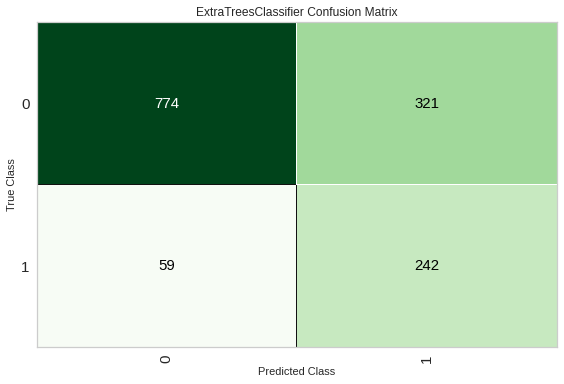

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_et, plot = 'confusion_matrix')

Tuned extra trees model has %45 precision and 75% accuracy. The confusion matrix shows a higher rate of fase positives than true positives. This is potentially harmful to the client's brand trust. Conversly, there are few cases of false negatives, so the extra trees classifier reduces profit loss from underpricing high quality wines.

In [ ]:
# tune random forest model
tuned_rf = tune_model(rf, optimize='Prec.')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7607,0.8488,0.8000,0.4667,0.5895,0.4367,0.4683
1,0.7423,0.8577,0.7714,0.4426,0.5625,0.3983,0.4292
2,0.7883,0.8522,0.7286,0.5050,0.5965,0.4594,0.4735
3,0.8006,0.8294,0.7286,0.5258,0.6108,0.4814,0.4930
4,0.7914,0.8459,0.7571,0.5096,0.6092,0.4742,0.4915
5,0.7270,0.7986,0.6143,0.4095,0.4914,0.3149,0.3270
6,0.7117,0.8130,0.6761,0.4034,0.5053,0.3197,0.3409
7,0.8185,0.8957,0.8857,0.5487,0.6776,0.5608,0.5919
8,0.7692,0.8389,0.6429,0.4737,0.5455,0.3955,0.4038


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


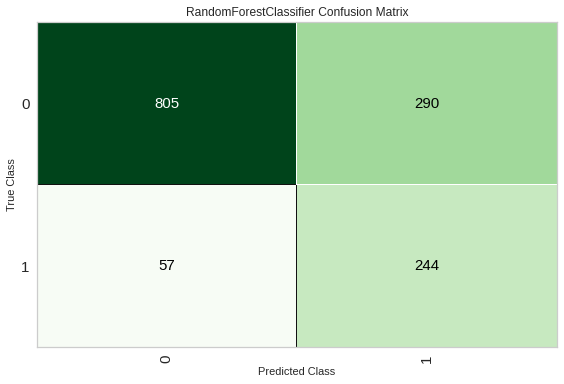

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf, plot = 'confusion_matrix')

The random forest classifier is showing 46.4% precision and a mean accuracy of 76.6%. While this is slightly better than extra treees model, the performance is still not ideal. Most of the improvement comes from accurately identifying more standard wines (true negatives). Only two additional true positives were identified. 

In [ ]:
# tune lgb model
tuned_lgb = tune_model(lgb, optimize='Prec.')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8436,0.8950,0.5857,0.6508,0.6165,0.5186,0.5198
1,0.8497,0.8511,0.6286,0.6567,0.6423,0.5472,0.5475
2,0.8466,0.8560,0.5857,0.6613,0.6212,0.5255,0.5270
3,0.8497,0.8589,0.5857,0.6721,0.6260,0.5325,0.5344
4,0.8650,0.8932,0.7429,0.6667,0.7027,0.6157,0.6172
5,0.8313,0.8319,0.5286,0.6271,0.5736,0.4694,0.4721
6,0.8650,0.8614,0.6620,0.7015,0.6812,0.5956,0.5961
7,0.8615,0.9282,0.8000,0.6437,0.7134,0.6235,0.6299
8,0.8462,0.8969,0.6143,0.6515,0.6324,0.5352,0.5356


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


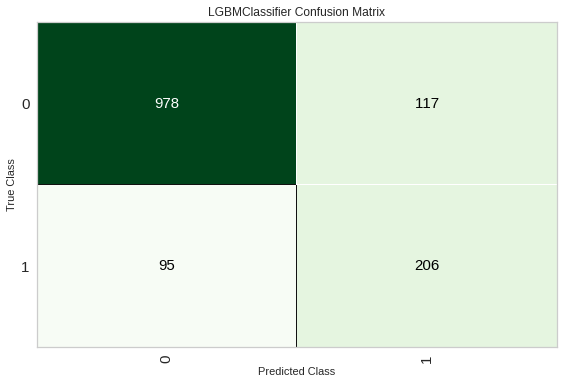

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lgb, plot = 'confusion_matrix')

The light gradient boosting model shows the best performance on the training data by far. The classifier has 64.7% precision and 84.6% accuracy. While light gradient boosting model has the fewest true positives, it also minimized false positives (which harm the brand reputation) and false negative (which cost the client money).

## Check Performance on Validation Set

As noted above, machine learning models tend to perform better on the training data than validation data. Before we finalize our choice of classifier, we need to test the models' performance on the validation set.

In [ ]:
#ET performance on the validation set
pred_holdout_et = predict_model(tuned_et)
pred_holdout_et.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7278,0.8375,0.804,0.4298,0.5602,0.3883,0.4282


,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,Label,Score
0,-0.236945,-0.148537,0.257667,-0.784333,0.283892,-0.370703,0.099835,-0.821698,1.652311,0,1,0.8592
1,-1.328910,-1.023989,-0.695223,0.013572,-0.024714,-0.296549,0.298438,-0.701081,-1.137028,0,0,0.7546
2,-0.632079,-0.419966,1.337734,0.600194,1.743240,1.603736,0.363247,-1.599922,-0.803320,0,0,0.8483
3,0.598951,1.135776,-0.905309,0.600194,-1.096339,-0.852266,-0.536955,0.662836,0.691685,0,0,0.5832
4,0.818899,0.215861,0.082074,0.471080,0.513223,0.978935,1.217709,0.957118,-0.194076,0,0,0.7107


In [ ]:
#RF performance on the validation set
pred_holdout_rf = predict_model(tuned_rf)
pred_holdout_rf.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7514,0.8463,0.8106,0.4569,0.5844,0.4262,0.4618


,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,Label,Score
0,-0.236945,-0.148537,0.257667,-0.784333,0.283892,-0.370703,0.099835,-0.821698,1.652311,0,1,0.8370
1,-1.328910,-1.023989,-0.695223,0.013572,-0.024714,-0.296549,0.298438,-0.701081,-1.137028,0,0,0.8497
2,-0.632079,-0.419966,1.337734,0.600194,1.743240,1.603736,0.363247,-1.599922,-0.803320,0,0,0.9001
3,0.598951,1.135776,-0.905309,0.600194,-1.096339,-0.852266,-0.536955,0.662836,0.691685,0,0,0.7342
4,0.818899,0.215861,0.082074,0.471080,0.513223,0.978935,1.217709,0.957118,-0.194076,0,0,0.7873


In [ ]:
#LGB performance on the validation set
pred_holdout_lgb = predict_model(tuned_lgb)
pred_holdout_lgb.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8481,0.8873,0.6844,0.6378,0.6603,0.5626,0.5632


,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,Label,Score
0,-0.236945,-0.148537,0.257667,-0.784333,0.283892,-0.370703,0.099835,-0.821698,1.652311,0,1,0.9891
1,-1.328910,-1.023989,-0.695223,0.013572,-0.024714,-0.296549,0.298438,-0.701081,-1.137028,0,0,0.9937
2,-0.632079,-0.419966,1.337734,0.600194,1.743240,1.603736,0.363247,-1.599922,-0.803320,0,0,0.9987
3,0.598951,1.135776,-0.905309,0.600194,-1.096339,-0.852266,-0.536955,0.662836,0.691685,0,0,0.9486
4,0.818899,0.215861,0.082074,0.471080,0.513223,0.978935,1.217709,0.957118,-0.194076,0,0,0.9569


The light gradient boosting model still has the best precision and accuracy out of our three classifiers. Moreover, the performance on the validation set is not much lower than the training performance. This indicates that our model is not overfit and can generalise relatively well to unseen data. Therefore, we will finalize the light gradient boosting model to present to the client.

In [ ]:
#Finalize model and retrain on the combined training and validation sets before testing on the 5% holdout
final_lgb = finalize_model(tuned_lgb)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
       

In [ ]:
print(final_lgb)

LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


## Predict on Unseen Data 

As a demonstration of how the model works, we predict the quality of wines in the 5% holdout data that we removed at the begining of the notebook before feature engineering. 

In [ ]:
# 5% sample witheld in the beginning
data_unseen.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
1,8.6,0.23,0.40,4.2,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,0
2,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,1
3,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,0
4,6.0,0.19,0.26,12.4,0.048,50.0,147.0,0.9972,3.30,0.36,8.9,0


In [ ]:
# drop the quality column (classification label) from data_unseen
data_unseen.drop('quality', axis = 1, inplace = True)
data_unseen.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
1,8.6,0.23,0.40,4.2,0.035,17.0,109.0,0.9947,3.14,0.53,9.7
2,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4
3,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3
4,6.0,0.19,0.26,12.4,0.048,50.0,147.0,0.9972,3.30,0.36,8.9


In [ ]:
#predict class using the finalized model
pred_unseen = predict_model(final_lgb, data=data_unseen)
pred_unseen.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Label,Score
0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,0.9946
1,8.6,0.23,0.40,4.2,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,0,0.9884
2,6.6,0.16,0.40,1.5,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,1,0.8064
3,7.4,0.34,0.42,1.1,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,0,0.6941
4,6.0,0.19,0.26,12.4,0.048,50.0,147.0,0.9972,3.30,0.36,8.9,0,0.9858


In [ ]:
#save model
save_model(final_lgb,'lgb_final_pipeline')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), model_name=lgb_final_pipeline, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                              

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='quality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                 colsample_bytree=1.0, feature_fraction=0.5,
                                 importance_type='split', learning_rate=0.4,
                                 max_depth=-1, min_child_samples=6,
                                 min_child_weight=0.

## Conclusions
* which model we chose and why
* how it addresses the business problem
* https://wineplus.herokuapp.com/

## References


Cortez, P., Cerdeira, A., Almeida, F., Matos, T., and Reis, J.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Mani, S., Krishnankutty, R. A., Swaminathan, S., & Theerthagiri, P. (2023). An investigation of wine quality testing using machine learning techniques. IAES International Journal of Artificial Intelligence, 12(2), 747.
